# Superstore Analysis and Projections

Author: Prabaningrum Hendraswari Buditjahjono & Ferry M. Suhendra

### Introduction

Obtained from [Kaggle](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting), this dataset contains what is assumed to be retail data from an unnamed global superstore in a span of 4 years. This dataframe contains 18 features/columns that are self explanatory. 

Superstores are by definition retail locations that aim to be a one-stop shop and have a store area more than 80.000 square feet. In managing a superstore, a company might be faced with a lot of problems. Some were exacerbated by the growing number of competitors. A few of these issues include finding out what the customers want from the store and trying to retain existing customers. An analysis of the store's data is required to address the issues. As a result, from this dataset, we want to:

1. Determine when is the period with the most orders

2. Determine what shipping mode is mostly used

3. Determine which State/County bought the most items 

4. Determine which categories are bought most

5. Identify certain interesting patterns

6. Forecast which items will have an increase in trends in the next 3 months.

### Import Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from feature_engine.outliers import Winsorizer

import datetime
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [85]:
df = pd.read_csv('SuperstoreData.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Are the orders only from the US? if so, we can get rid of the country column.

In [86]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [87]:
#Dropping unimportant columns
df.drop(['Row ID', 'Country'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Postal Code    9789 non-null   float64
 10  Region         9800 non-null   object 
 11  Product ID     9800 non-null   object 
 12  Category       9800 non-null   object 
 13  Sub-Category   9800 non-null   object 
 14  Product Name   9800 non-null   object 
 15  Sales          9800 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.2+ MB


There are missing values in the postal code. Not a big deal, but it becomes a question on how the package gets delivered in the first place.

In [89]:
#Handling missing values
df.fillna(0,inplace= True)
# converting 'Postal Code' from float to int
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Postal Code    9800 non-null   int32  
 10  Region         9800 non-null   object 
 11  Product ID     9800 non-null   object 
 12  Category       9800 non-null   object 
 13  Sub-Category   9800 non-null   object 
 14  Product Name   9800 non-null   object 
 15  Sales          9800 non-null   float64
dtypes: float64(1), int32(1), object(14)
memory usage: 1.2+ MB


### Exploratory Data Analysis

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9800.0,55211.280918,32076.677954,0.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [91]:
df[df['Postal Code'] == 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,Burlington,Vermont,0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,Burlington,Vermont,0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,Burlington,Vermont,0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


There seems to be no way of knowing whether the package is delivered or not, because shipping doesn't mean it's received by the customer.

There appears to be purchases of orders under 1$, this may be worth looking into to make sure its not an error.

In [92]:
df[df['Sales'] < 1]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2106,US-2015-152723,26/09/2015,26/09/2015,Same Day,HG-14965,Henry Goldwyn,Corporate,Mesquite,Texas,75150,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876
2761,CA-2018-126536,12/10/2018,14/10/2018,First Class,NK-18490,Neil Knudson,Home Office,San Francisco,California,94110,West,TEC-AC-10003709,Technology,Accessories,Maxell 4.7GB DVD-R 5/Pack,0.990
4101,US-2018-102288,19/06/2018,23/06/2018,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444
4711,CA-2015-112403,31/03/2015,31/03/2015,Same Day,JO-15280,Jas O'Carroll,Consumer,Philadelphia,Pennsylvania,19120,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852
7548,CA-2015-103492,10/10/2015,15/10/2015,Standard Class,CM-12715,Craig Molinari,Corporate,Huntsville,Texas,77340,Central,OFF-BI-10004140,Office Supplies,Binders,Avery Non-Stick Binders,0.898
8033,CA-2016-119690,25/06/2016,28/06/2016,First Class,MV-17485,Mark Van Huff,Consumer,Houston,Texas,77041,Central,OFF-BI-10000201,Office Supplies,Binders,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",0.984
8658,CA-2017-168361,21/06/2017,25/06/2017,Standard Class,KB-16600,Ken Brennan,Corporate,Chicago,Illinois,60623,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836
9292,CA-2018-124114,02/03/2018,02/03/2018,Same Day,RS-19765,Roland Schwarz,Corporate,Waco,Texas,76706,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556


Assuming that the shipping mode is faster the higher the class, there doesn't seem to be significant patterns in the order under $1 except that most of them seem to be needed quickly as 5 out of 8 of the customers picked Same day or First class shipping mode.

In [93]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   int32         
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

In [95]:
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Ship Date'].min())
print(df['Ship Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00
2015-01-04 00:00:00
2019-05-01 00:00:00


There is a gap between last order & last shipping. Why? Is it the same order?

What is the average shipping time (from order to shipping)?

In [106]:
df[df['Order Date'] == '2018-12-30 00:00:00']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
645,CA-2018-126221,2018-12-30,2019-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
906,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
907,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
908,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
1296,CA-2018-115427,2018-12-30,2019-03-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904
1297,CA-2018-115427,2018-12-30,2019-03-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
5091,CA-2018-156720,2018-12-30,2019-03-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024


In [107]:
df[df['Ship Date'] == '2019-05-01 00:00:00']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
645,CA-2018-126221,2018-12-30,2019-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.30
5131,CA-2018-146626,2018-12-29,2019-05-01,Standard Class,BP-11185,Ben Peterman,Corporate,Anaheim,California,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.12


In [96]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

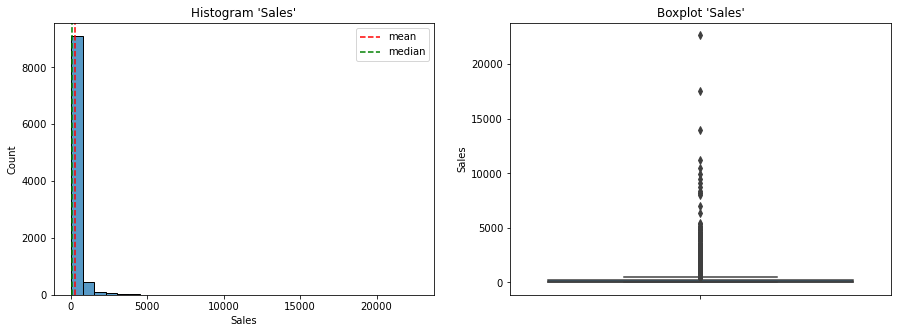

Sales Kurtosis: 304.4450883210413
Sales Skewness: 12.983482865034619
Columns 'Sales' right skewed


In [97]:
# checking data distribution of sales
plot_dist(df,'Sales')

There are outliers in the sales data. due to the low ammount of data to work with these outliers will be winsorized.


In [98]:
# Capping sales using Winsorizer
dfw = df
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3,variables=['Sales'])
winsorizer.fit(dfw)
dfw = winsorizer.transform(dfw)

            Sales
Order Date       
2018-09-30    382


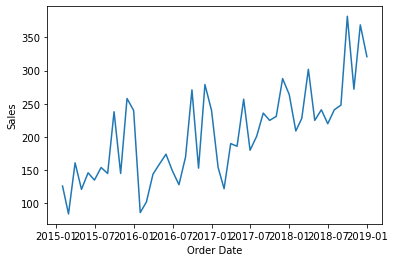

In [99]:
# Checking for month with most sales count
dfn=dfw
dfn.index=dfn['Order Date']
dfns=pd.DataFrame(dfn.groupby(pd.Grouper(freq='M'))['Sales'].count())

# Plotting counts
sns.lineplot(x='Order Date',y='Sales',data=dfns)
print(dfns[dfns['Sales']==dfns['Sales'].max()])

It's found that the highest sales count comes from the period of September 2018.

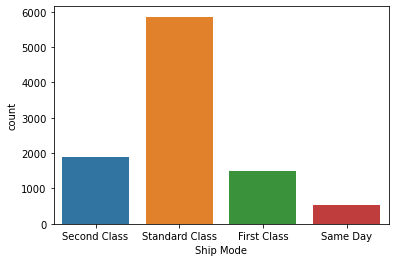

In [100]:
plt.subplot()
sns.countplot(df['Ship Mode'])
plt.show()

Most sales are delivered using the standard class delivery.

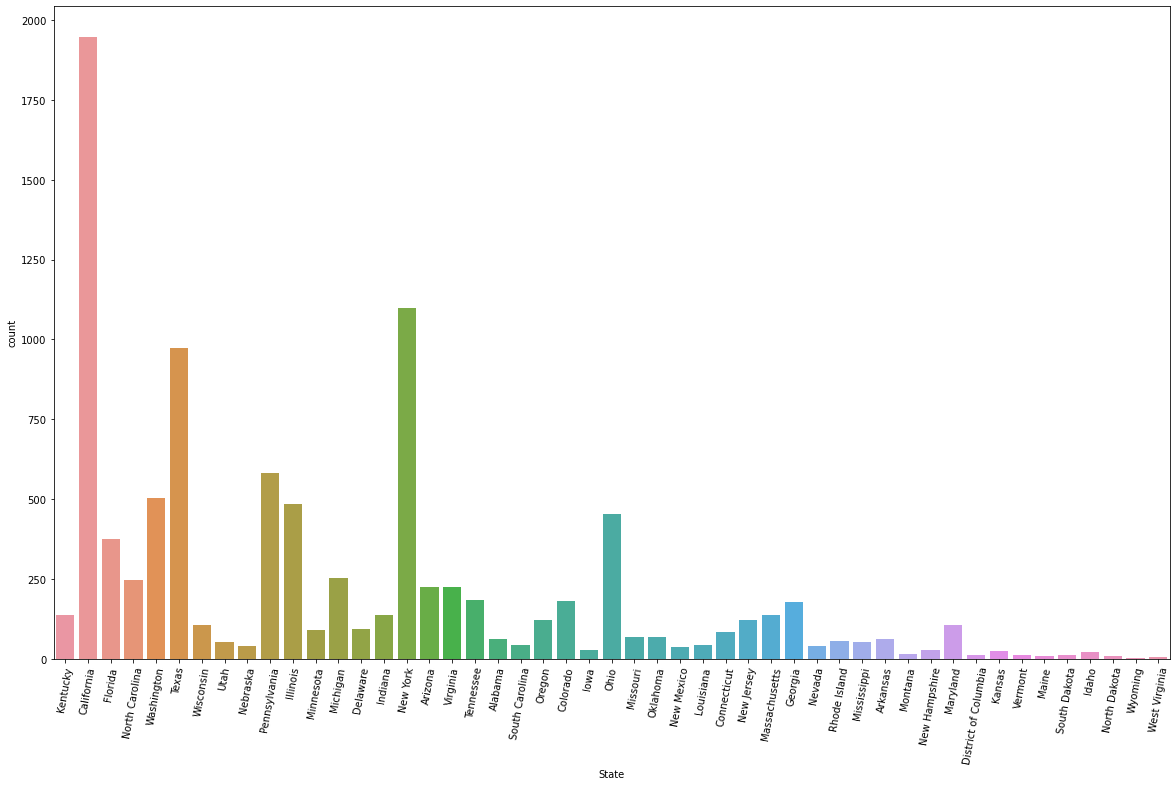

In [101]:
# checking sales count by state
plt.figure(figsize=(20, 12))
sns.countplot(df['State'])
plt.xticks(rotation=80)
plt.show()

Most of the sales from the 4 years of recorded data comes from Callifornia followed by New York and Texas.

In [109]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

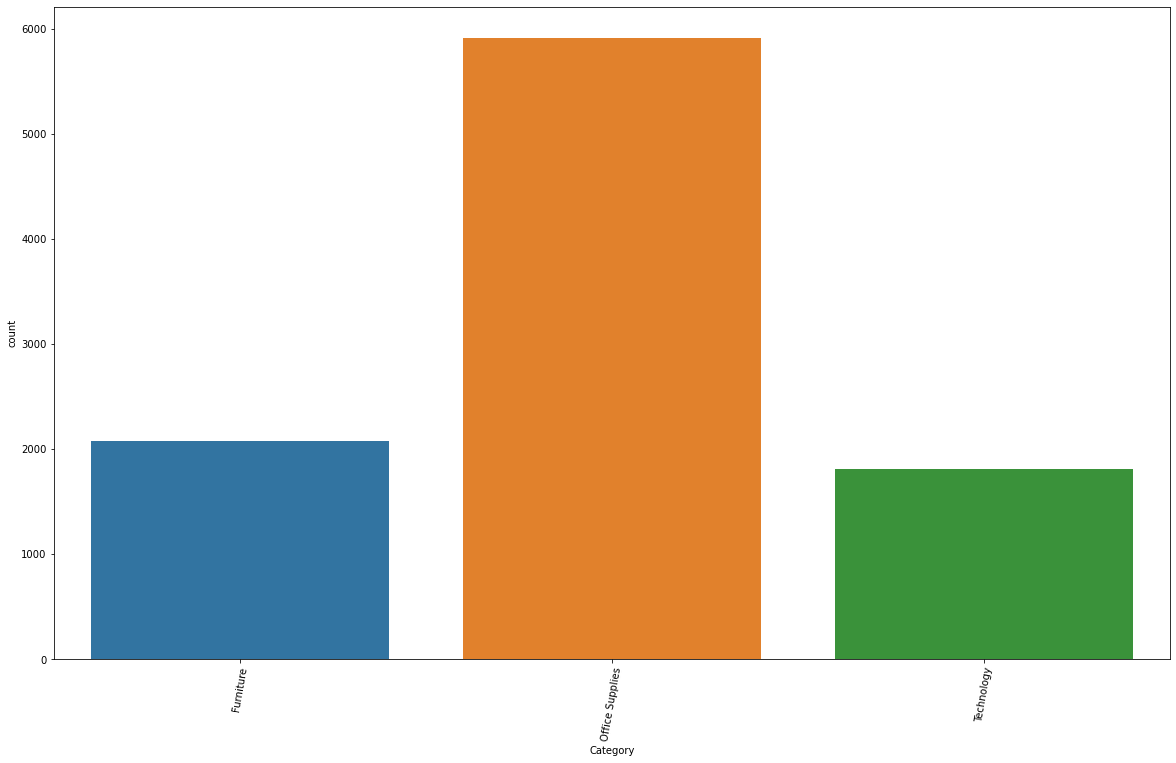

In [108]:
# checking sales count by category
plt.figure(figsize=(20, 12))
sns.countplot(df['Category'])
plt.xticks(rotation=80)
plt.show()

In [102]:
# Calculating yearly total sales
dfm= dfw
dfm.index=dfm['Order Date']
dfms=pd.DataFrame(dfm.groupby(pd.Grouper(freq='Y'))['Sales'].sum())
dfms

,Sales
Order Date,
2015-12-31,334461.0951
2016-12-31,352211.5939
2017-12-31,422274.6448
2018-12-31,521986.7627


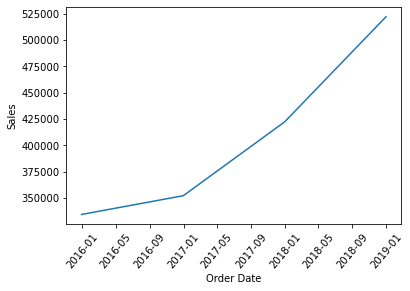

In [103]:
# Plotting Yearly total sales.
sns.lineplot(x='Order Date',y='Sales',data=dfms)
plt.xticks(rotation=50)
plt.show()

There has been a stable increase in total yearly sales every year.

In [104]:
# Separating data by year
dfm15=dfm[dfm['Order Date'].dt.year==2015]
dfm16=dfm[dfm['Order Date'].dt.year==2016]
dfm17=dfm[dfm['Order Date'].dt.year==2017]
dfm18=dfm[dfm['Order Date'].dt.year==2018]
# Calculating monthly total sales
dfm15=pd.DataFrame(dfm15.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm16=pd.DataFrame(dfm16.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm17=pd.DataFrame(dfm17.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm18=pd.DataFrame(dfm18.groupby(pd.Grouper(freq='M'))['Sales'].sum())

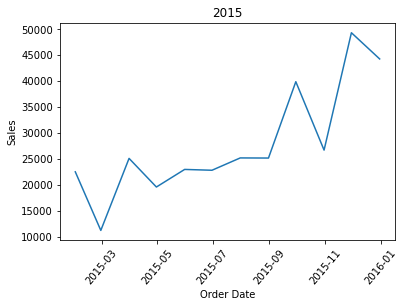

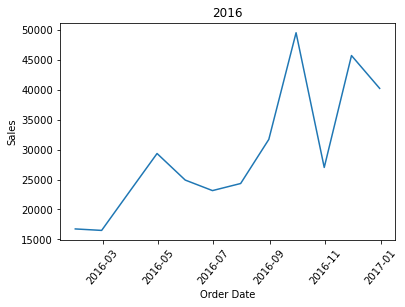

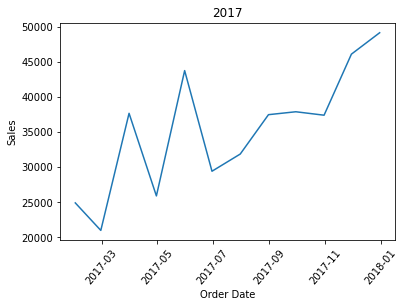

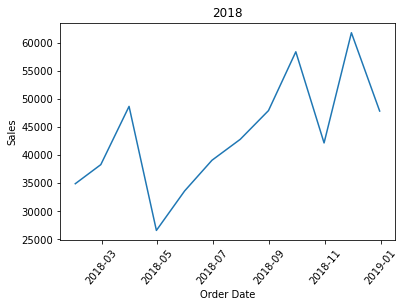

In [105]:
# Plotting monthly total sales by year.
plt.title('2015')
sns.lineplot(x='Order Date',y='Sales',data=dfm15)
plt.xticks(rotation=50)
plt.show()
plt.title('2016')
sns.lineplot(x='Order Date',y='Sales',data=dfm16)
plt.xticks(rotation=50)
plt.show()
plt.title('2017')
sns.lineplot(x='Order Date',y='Sales',data=dfm17)
plt.xticks(rotation=50)
plt.show()
plt.title('2018')
sns.lineplot(x='Order Date',y='Sales',data=dfm18)
plt.xticks(rotation=50)
plt.show()

### Data Preprocessing